In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
import seaborn as sns
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

### Summarizing Data

In [2]:
# read iris.csv file

iris_df = pd.read_csv("C:/Users/nlrob/OneDrive/Desktop/JUMPRO Project/Iris.csv")

In [3]:
# first 5 records of iris.csv file

iris_df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
# show a dataframe which has petalwidth greater than 4
iris_df.loc[iris_df['SepalWidthCm'] > 4.0]

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
15,16,5.7,4.4,1.5,0.4,Iris-setosa
32,33,5.2,4.1,1.5,0.1,Iris-setosa
33,34,5.5,4.2,1.4,0.2,Iris-setosa


In [5]:
# show a dataframe which has petalwidth greater than 1
iris_df.loc[iris_df['PetalWidthCm'] > 1.0]

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
50,51,7.0,3.2,4.7,1.4,Iris-versicolor
51,52,6.4,3.2,4.5,1.5,Iris-versicolor
52,53,6.9,3.1,4.9,1.5,Iris-versicolor
53,54,5.5,2.3,4.0,1.3,Iris-versicolor
54,55,6.5,2.8,4.6,1.5,Iris-versicolor
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [6]:
# retrieve records which have petalwidth more than 2

iris_df.loc[iris_df['PetalWidthCm'] > 2.0]


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
100,101,6.3,3.3,6.0,2.5,Iris-virginica
102,103,7.1,3.0,5.9,2.1,Iris-virginica
104,105,6.5,3.0,5.8,2.2,Iris-virginica
105,106,7.6,3.0,6.6,2.1,Iris-virginica
109,110,7.2,3.6,6.1,2.5,Iris-virginica
112,113,6.8,3.0,5.5,2.1,Iris-virginica
114,115,5.8,2.8,5.1,2.4,Iris-virginica
115,116,6.4,3.2,5.3,2.3,Iris-virginica
117,118,7.7,3.8,6.7,2.2,Iris-virginica
118,119,7.7,2.6,6.9,2.3,Iris-virginica


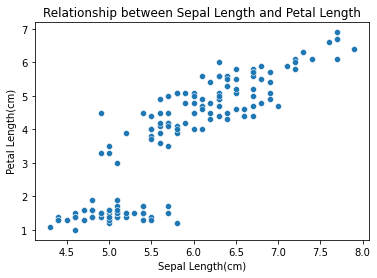

In [10]:
# relationship between sepallength and petallength
# draw a scatter plot and show relationship

# create scatterplot
sns.scatterplot(x='SepalLengthCm',y='PetalLengthCm',data=iris_df)

# creating axis labels
plt.title('Relationship between Sepal Length and Petal Length')
plt.xlabel('Sepal Length(cm)')
plt.ylabel('Petal Length(cm)')
plt.show()


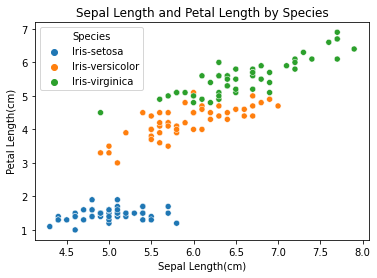

In [11]:
# apply species as hue in the same scatter plot for better visibility and understanding

# create scatterplot
sns.scatterplot(x='SepalLengthCm',y='PetalLengthCm',hue='Species',data=iris_df)

# specify axis labels
plt.title('Sepal Length and Petal Length by Species')
plt.xlabel('Sepal Length(cm)')
plt.ylabel('Petal Length(cm)')
plt.show()


### Applying Linear Regression

Model 1

In [80]:
# store SepalWidthCm as independent variable (X) , SepalLengthCm as dependent variable (Y)  

X = iris_df['SepalWidthCm'].values.reshape(-1,1)
Y = iris_df['SepalLengthCm'].values.reshape(-1,1)


In [81]:
# show shape of X,Y objects

X.shape, Y.shape

((150, 1), (150, 1))

In [82]:
# perform 70/30 data split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30)

In [83]:
# data dimension for X_train and Y_train

X_train.shape, Y_train.shape


((105, 1), (105, 1))

In [84]:
# data dimension for X_test and Y_test

X_test.shape, Y_test.shape

((45, 1), (45, 1))

Building Linear Regression Model for Model 1

In [85]:
# Define the regression model

lr = LinearRegression()

In [86]:
# build training model

lr.fit(X_train, Y_train)

LinearRegression()

In [87]:
# apply trained model to make prediction (test set)

Y_pred = lr.predict(X_test)

Prediction Results for Model 1

In [145]:
# model performance for model 1

print('Coefficient:', lr.coef_)
print('Intercept:', lr.intercept_)
print('Mean squared error (MSE): %.2f' % mean_absolute_error(Y_test,Y_pred))
print('Coefficient of determination (R^2): %.2f' % r2_score(Y_test,Y_pred))

Coefficient: [[0.82379121]]
Intercept: [4.80272402]
Mean squared error (MSE): 0.62
Coefficient of determination (R^2): -0.11


Scatter Plot of Model 1

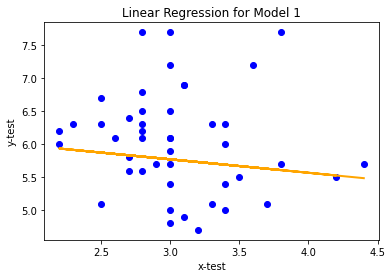

In [144]:
plt.scatter(X_test,Y_test, color='blue')
plt.plot(X_test,Y_pred,color='orange',linewidth=2)
plt.title('Linear Regression for Model 1')
plt.xlabel('x-test')
plt.ylabel('y-test')
plt.show()

Model 2

In [130]:
# store dataframe of sepallengthcm as dependent variable

y1 = iris_df['SepalLengthCm'].values.reshape(-1,1)


In [131]:
# store 'sepalwidthcm', 'petallengthcm', 'petalwidthcm' dataframe as an independent variable
x1 = iris_df['SepalWidthCm'].values.reshape(-1,1)
x2 = iris_df['PetalLengthCm'].values.reshape(-1,1)
x3 = iris_df['PetalWidthCm'].values.reshape(-1,1)



In [132]:
# perform 70/30 train_test_split 

x_train,x_test,y_train,y_test = train_test_split(x1,y1,test_size=0.30)
x_train,x_test,y_train,y_test = train_test_split(x2,y1,test_size=0.30)
x_train,x_test,y_train,y_test = train_test_split(x3,y1,test_size=0.30)


Building Linear Regression Model for Model 2

In [133]:
# fit both train set into fit method of linearregression

lr.fit(x_train,y_train)

LinearRegression()

In [134]:
# predict x_test and store result into y_pred using predict method

y_pred = lr.predict(x_test)

Prediction Results for Model 2

In [135]:
# model performance

print('Coefficient:', lr.coef_)
print('Intercept:', lr.intercept_)
print('Mean squared error (MSE): %.2f' % mean_absolute_error(y_test,y_pred))
print('Coefficient of determination (R^2): %.2f' % r2_score(y_test,y_pred))

Coefficient: [[0.82379121]]
Intercept: [4.80272402]
Mean squared error (MSE): 0.41
Coefficient of determination (R^2): 0.61


Scatter Plot of Model 2

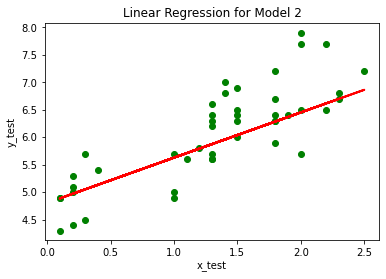

In [136]:
# plotting regression line for model 2

plt.scatter(x_test,y_test, color='green')
plt.plot(x_test,y_pred,color='red',linewidth=2)
plt.title('Linear Regression for Model 2')
plt.xlabel('x_test')
plt.ylabel('y_test')
plt.show()